# Tarea 6. Optimización
Guillermo Segura Gómez

## Ejercicio 1

**1. Programe el método de gradiente conjugado lineal, Algoritmo 1 de la Clase 18, para resolver el sistema de ecuaciones $\mathbf{A}\mathbf{x}=\mathbf{b}$, donde $\mathbf{A}$ es una matriz simétrica y definida positiva.**
   
**Haga que la función devuelva el último punto  $\mathbf{x}_k$, el último residual $\mathbf{r}_k$, el número de iteraciones $k$ y una variable binaria $bres$ que indique si se cumplió el criterio de paro ($bres=True$) o si el algoritmo terminó por iteraciones ($bres=False$).**

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ConjugateGradient(xk, A, b, nMax, tau):
    rk = A @ xk - b
    pk = -rk
    for k in range(nMax):
        
        # Condición de parada
        if np.linalg.norm(rk) < tau:
            return xk, rk_next, True, k

        Apk = A @ pk # Cálculo de Apk para optimizar

        # Cálculo de alphak
        rkTrk = rk.T @ rk
        alphak = rkTrk / (pk.T @ Apk)
        
        # Siguiente valor de xk
        xk = xk + alphak * pk
        rk_next = rk + alphak * Apk
        
        betak = (rk_next.T @ rk_next) / rkTrk
        pk = -rk_next + betak * pk
        rk = rk_next

    return xk, rk, False, nMax 

2. Pruebe el algoritmo para resolver el sistema de ecuaciones 

$$ \mathbf{A}_1\mathbf{x}=\mathbf{b}_1$$

donde

$$ \mathbf{A}_1 = n\mathbf{I} + \mathbf{1} = 
\left[\begin{array}{llll} n      & 0      & \cdots & 0 \\
                       0      & n      & \cdots & 0 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       0      & 0      & \cdots & n \end{array}\right]
+ \left[\begin{array}{llll} 1    & 1      & \cdots & 1 \\
                       1      & 1      & \cdots & 1 \\ 
                       \vdots & \vdots & \ddots & \vdots \\
                       1      & 1      & a\cdots & 1 \end{array}\right],  \qquad
\mathbf{b}_1 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right], $$

$n$ es la dimensión de la variable independiente
$\mathbf{x}=(x_1, x_2, ..., x_n)$, 
$\mathbf{I}$ es la matriz identidad y $\mathbf{1}$ es la matriz llena de 1's,
ambas de tamaño $n$.

También aplique el algoritmo para resolver el sistema 

$$ \mathbf{A}_2\mathbf{x}=\mathbf{b}_2$$

donde  $\mathbf{A}_2 = [a_{ij}]$ con

$$ a_{ij} = exp\left(-0.25(i-j)^2 \right),  \qquad
\mathbf{b}_2 = \left[\begin{array}{l} 1 \\ 1 \\ \vdots \\ 1 \end{array}\right] $$


- Use $\mathbf{x}_0$ como el vector cero, el máximo número de iteraciones 
  $N=n$ y una toleracia $\tau=\sqrt{n} \epsilon_m^{1/3}$,
  donde $\epsilon_m$ es el épsilon máquina.
- Pruebe el algoritmo resolviendo los dos sistemas de ecuaciones con $n=10, 100, 1000$ y 
  en cada caso imprima la siguiente información

- la dimensión $n$,
- el  número $k$ de iteraciones realizadas,
- las primeras y últimas 4 entradas del punto $\mathbf{x}_k$ que devuelve el algoritmo,
- la norma del residual $\mathbf{r}_k$, 
- la variable $bres$ para saber si el algoritmo puedo converger.

In [3]:
# Función para generar A1 y b1
def generate_A1_b1(n):
    A1 = n * np.eye(n) + np.ones((n, n))
    b1 = np.ones(n)
    return A1, b1

# Función para generar A2 y b2
def generate_A2_b2(n):
    A2 = np.array([[np.exp(-0.25 * (i - j) ** 2) for j in range(n)] for i in range(n)])
    b2 = np.ones(n)
    return A2, b2

# Función para probar el algoritmo con las matrices y vectores dados
def test_algorithm(n):
    epsilon_m = np.finfo(float).eps  # Epsilon máquina
    tau = np.sqrt(n) * (epsilon_m ** (1/3))  # Tolerancia
    x0 = np.zeros(n)  # Vector inicial
    nMax = n  # Número máximo de iteraciones

    # Generar A1, b1 y aplicar el Gradiente Conjugado
    A1, b1 = generate_A1_b1(n)
    xk1, rk1, bres1, k1 = ConjugateGradient(x0, A1, b1, nMax, tau)

    # Generar A2, b2 y aplicar el Gradiente Conjugado
    A2, b2 = generate_A2_b2(n)
    xk2, rk2, bres2, k2 = ConjugateGradient(x0, A2, b2, nMax, tau)

    # Imprimir resultados para A1
    print(f"n={n}, Sistema A1")
    print(f"  Iteraciones: {k1}")
    print(f"  xk (primeras 4 entradas): {xk1[:4]}")
    print(f"  xk (últimas 4 entradas): {xk1[-4:]}")
    print(f"  Norma del residual: {np.linalg.norm(rk1)}")
    print(f"  Convergencia: {bres1}")

    # Imprimir resultados para A2
    print(f"n={n}, Sistema A2")
    print(f"  Iteraciones: {k2}")
    print(f"  xk (primeras 4 entradas): {xk2[:4]}")
    print(f"  xk (últimas 4 entradas): {xk2[-4:]}")
    print(f"  Norma del residual: {np.linalg.norm(rk2)}")
    print(f"  Convergencia: {bres2}")

# Prueba del algoritmo para n=10, 100, 1000
for n in [10, 100, 1000]:
    test_algorithm(n)
    print("\n" + "-"*50 + "\n")

n=10, Sistema A1
  Iteraciones: 1
  xk (primeras 4 entradas): [0.05 0.05 0.05 0.05]
  xk (últimas 4 entradas): [0.05 0.05 0.05 0.05]
  Norma del residual: 0.0
  Convergencia: True
n=10, Sistema A2
  Iteraciones: 5
  xk (primeras 4 entradas): [ 1.36909916 -1.16637682  1.60908281 -0.61339053]
  xk (últimas 4 entradas): [-0.61339053  1.60908281 -1.16637682  1.36909916]
  Norma del residual: 6.74381437063642e-12
  Convergencia: True

--------------------------------------------------

n=100, Sistema A1
  Iteraciones: 1
  xk (primeras 4 entradas): [0.005 0.005 0.005 0.005]
  xk (últimas 4 entradas): [0.005 0.005 0.005 0.005]
  Norma del residual: 0.0
  Convergencia: True
n=100, Sistema A2
  Iteraciones: 100
  xk (primeras 4 entradas): [ 1.44629477 -1.41634972  2.11045112 -1.42495892]
  xk (últimas 4 entradas): [-1.4249764   2.11046275 -1.4163319   1.44627613]
  Norma del residual: 7.403895171646005e-05
  Convergencia: False

--------------------------------------------------

n=1000, Sistem

Podemos observar que para el sistema $\mathbf{A}_1\mathbf{x}=\mathbf{b}_1$, el algoritmo converge rápidamente (en 1 iteración) para todos los valores de $n$ probados. Esto se puede explicar con la simplicidad y estructura de la matriz $\mathbf{A}_1$.

Por otro lado, el sistema $\mathbf{A}_2\mathbf{x}=\mathbf{b}_2$ presenta un mayor desafío, especialmente para $n=100$ donde no se logró la convergencia dentro del número máximo de iteraciones. Sin embargo, para $n=1000$, el algoritmo pudo converger, pero necesitó un mayor número de iteraciones (262), lo que indica la complejidad creciente del sistema con el aumento de $n$.

## Ejercicio 2

**Programar el método de gradiente conjugado no lineal descrito en el Algoritmo 3  de Clase 19 usando la fórmula de Fletcher-Reeves:**

$$ \beta_{k+1} = \frac{\nabla f_{k+1}^\top \nabla f_{k+1}}{\nabla f_{k}^\top\nabla f_{k}}  $$ 

1. Escriba la función que implemente el algoritmo. 

- La función debe recibir como argumentos $\mathbf{x}_0$, la función $f$ y 
  su gradiente, el número máximo de iteraciones $N$, la tolerancia $\tau$, y los
  parámetros para el algoritmo de backtracking: factor $\rho$, la constante $c_1$
  para la condición de descenso suficiente, la constante $c_2$ para la condición
  de curvatura, y el máximo número de iteraciones $N_b$.
- Agregue al algoritmo un contador
  $nr$ que se incremente cada vez que se aplique el reinicio, es decir, cuando
  se hace $\beta_{k+1}=0$.
   
- Para calcular el tamaño de paso $\alpha_k$ use el algoritmo de backtracking
  usando las condiciones de Wolfe con el valor inicial $\alpha_{ini}=1$.

- Haga que la función devuelva el último punto  $\mathbf{x}_k$, 
  el último gradiente $\mathbf{g}_k$, el número de iteraciones $k$ 
  y una variable binaria $bres$ que indique si se cumplio el criterio
  de paro ($bres=True$) o si el algoritmo terminó por
  iteraciones ($bres=False$), y el contador $bres$.

In [21]:
def backtracking_wolfe(xk, pk, gk, f, gradf, alpha_0, rho, c1, c2, nMax):
    alpha = alpha_0
    for i in range(nMax):
        x_next = xk + alpha * pk
        f_next = f(x_next)
        f_curr = f(xk)
        gk_next = gradf(x_next)
        
        # Condición de descenso suficiente
        if f_next > f_curr + c1 * alpha * np.dot(gk, pk):
            alpha *= rho
        # Condición de curvatura
        elif np.dot(gk_next, pk) < c2 * np.dot(gk, pk):
            alpha *= rho
        else:
            return alpha, i
    return alpha

In [45]:
def ConjugateGrad_NLineal(x0, f, gradf, nMax, tau, alpha_0, rho, c1, c2, nBack):
    xk = np.array(x0)
    gk = gradf(xk)
    dk = -gk
    nr = 0  # Contador de reinicios
    sequence = []

    for k in range(nMax):
        if np.linalg.norm(gk) < tau:
            return xk, gk, k, True, sequence, nr
        
        alpha_k, _ = backtracking_wolfe(xk, dk, gk, f, gradf, alpha_0, rho, c1, c2, nBack)
        xk += alpha_k * dk
        gk_next = gradf(xk)
        yk = gk_next - gk
        
        # Condición para el reinicio (revisar ortogonalidad)
        if abs(gk_next.T @ gk) < (0.2 * np.linalg.norm(gk_next)**2):
            betak = (gk_next.T @ yk) / (-dk.T @ gk)
        else:
            betak = 0
            nr += 1
        
        dk = -gk_next + betak * dk
        gk = gk_next
        
        # Almacenar puntos solo para visualización en 2D
        if len(x0) == 2:
            sequence.append(xk.tolist())

    return xk, gk, k, False, sequence, nr  # No se alcanzó la convergencia dentro de nMax

2. Pruebe el algoritmo usando la siguientes funciones con los puntos iniciales dados:


**Función de cuadrática 1:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_1\mathbf{x} - \mathbf{b}_1^\top\mathbf{x}$,
  donde $\mathbf{A}_1$ y $\mathbf{b}_1$ están definidas como en el Ejercicio 1.
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

**Función de cuadrática 2:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

- $f(\mathbf{x}) = \frac{1}{2} \mathbf{x}^\top\mathbf{A}_2\mathbf{x} - \mathbf{b}_2^\top\mathbf{x}$,
  donde $\mathbf{A}_2$ y $\mathbf{b}_2$ están definidas como en el Ejercicio 1.
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{10}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{100}$ 
- $\mathbf{x}_0 = (0,...,0)\in \mathbb{R}^{1000}$ 

**Función de Beale :** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (1.5-x_1 + x_1x_2)^2 + (2.25 - x_1 + x_1x_2^2)^2 + (2.625 - x_1 + x_1x_2^3)^2.$$
- $\mathbf{x}_0 = (2,3)$  
   

**Función de Himmelblau:** Para $\mathbf{x}=(x_1,x_2)$

$$f(\mathbf{x}) = (x_1^2 + x_2 - 11)^2 + (x_1 + x_2^2 - 7)^2. $$
- $\mathbf{x}_0 = (2,4)$



**Función de Rosenbrock:** Para $\mathbf{x}=(x_1,x_2, ..., x_n)$

$$ f(\mathbf{x}) = \sum_{i=1}^{n-1} \left[100(x_{i+1} - x_i^2)^2 + (1-x_i)^2 \right]
\quad n\geq 2.$$
- $\mathbf{x}_0 = (-1.2, 1.0)\in \mathbb{R}^{2}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{20}$  
- $\mathbf{x}_0 = (-1.2, 1.0, ..., -1.2, 1.0) \in \mathbb{R}^{40}$ 


3. Fije $N=5000$, $\tau = \sqrt{n}\epsilon_m^{1/3}$, donde $n$ es la dimensión
   de la variable $\mathbf{x}$ y $\epsilon_m$ es el épsilon máquina. 
   Para backtracking use $\rho=0.5$, $c_1=0.001$, $c_2=0.01$, $N_b=500$.
   
4. Para cada función de prueba imprima
   
- la dimensión $n$,
- $f(\mathbf{x}_0)$,
- el  número $k$ de iteraciones realizadas,
- $f(\mathbf{x}_k)$,
- las primeras y últimas 4 entradas del punto $\mathbf{x}_k$ que devuelve el algoritmo,
- la norma del vector gradiente $\mathbf{g}_k$, 
- la variable $bres$ para saber si el algoritmo puedo converger.
- el número de reinicios $nr$.

In [40]:
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

def grad_himmelblau(x):
    df_dx1 = 4 * x[0] * (x[0]**2 + x[1] - 11) + 2 * (x[0] + x[1]**2 - 7)
    df_dx2 = 2 * (x[0]**2 + x[1] - 11) + 4 * x[1] * (x[0] + x[1]**2 - 7)
    return np.array([df_dx1, df_dx2])

In [41]:
def beale(x):
    return ((1.5 - x[0] + x[0]*x[1])**2 + 
            (2.25 - x[0] + x[0]*x[1]**2)**2 + 
            (2.625 - x[0] + x[0]*x[1]**3)**2)

def grad_beale(x):
    x1, x2 = x
    df_dx1 = 2*(1.5 - x1 + x1*x2)*(-1 + x2) + 2*(2.25 - x1 + x1*x2**2)*(-1 + x2**2) + 2*(2.625 - x1 + x1*x2**3)*(-1 + x2**3)
    df_dx2 = 2*(1.5 - x1 + x1*x2)*x1 + 2*(2.25 - x1 + x1*x2**2)*2*x1*x2 + 2*(2.625 - x1 + x1*x2**3)*3*x1*x2**2
    return np.array([df_dx1, df_dx2])

In [42]:
def rosenbrock(x):
    return sum(100*(x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def grad_rosenbrock(x):
    df_dx = np.zeros_like(x)
    n = len(x)
    df_dx[:-1] += -400 * x[:-1] * (x[1:] - x[:-1]**2) + 2 * (x[:-1] - 1)  # Derivadas parciales para x_i donde i < n
    df_dx[1:] += 200 * (x[1:] - x[:-1]**2)  # Derivadas parciales para x_{i+1} donde i < n
    return df_dx

In [43]:
# Función para visualizar los contornos de nivel de función en 2D
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, secuencia=None):
    ax = np.linspace(xleft, xright, 250)
    ay = np.linspace(ybottom, ytop, 200)
    mX, mY = np.meshgrid(ax, ay)
    mZ = np.array([[fncf(np.array([x, y])) for x in ax] for y in ay])

    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='viridis')
    plt.colorbar(CS, ax=ax)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    # Graficar la secuencia de puntos
    if secuencia is not None:
        secuencia = np.array(secuencia)
        ax.plot(secuencia[:, 0], secuencia[:, 1], 'r.-')  # 'r.-' para puntos rojos conectados por líneas
        ax.plot(secuencia[0, 0], secuencia[0, 1], 'go')  # Punto de inicio en verde
        ax.plot(secuencia[-1, 0], secuencia[-1, 1], 'bo')  # Punto final en azul

    plt.show()

Función de Himmelblau:
Resultado para x0 = [2. 4.]:
xk = [3. 2.], k = 36, f(xk) = 8.968688794375265e-19, convergió: True
Numero de reinicios = 36
Secuencia de puntos: [[2.036028797018964, 0.9375522533880596], [3.622392052204093, 1.7018567089070877], [2.6416980564553554, 1.6231193072614585], [3.2899920484500775, 1.9831429898869533], [2.853534372522111, 1.886186966867733], [3.1296595466677166, 2.0299506002731262], [2.9346521925246942, 1.9636161004044053], [3.0319054785984876, 2.0085508444871394], [2.985607820986882, 1.991730390118323], [3.007627823182049, 2.0019352039366765]]


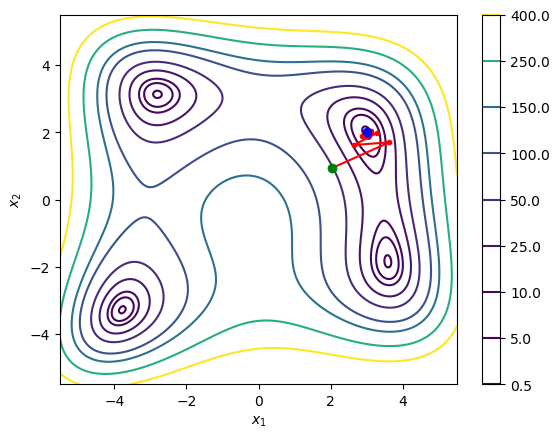


Resultado para x0 = [0. 0.]:
xk = [3. 2.], k = 40, f(xk) = 8.134335035808373e-19, convergió: True
Numero de reinicios = 39
Secuencia de puntos: [[2.348810240000001, 3.690987520000002], [2.348810240000001, 3.690987520000002], [2.3238792286679435, 0.7888477904688838], [3.8107981537939546, 1.4197155667232546], [2.7590010364742374, 1.3733244661618256], [3.365702745514365, 1.7553598246796402], [2.8803722410262997, 1.7502489690311183], [3.175242590581269, 1.9596947155156752], [2.9363009099137507, 1.919948363870565], [3.0744829023320994, 2.0058653137379094]]


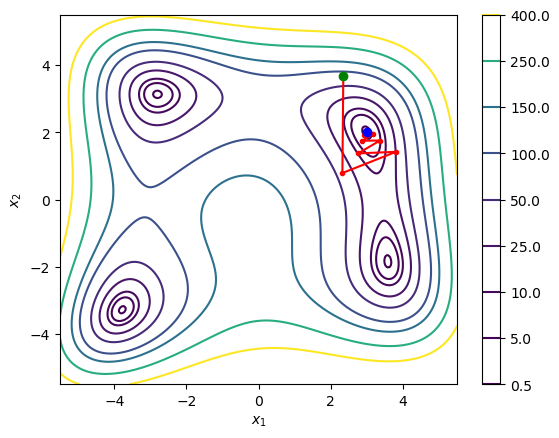


Función de Beale:
Resultado para x0 = [2. 3.]:
xk = [2.99999997 0.49999999], k = 1263, f(xk) = 1.6049783440743815e-16, convergió: True
Numero de reinicios = 1263
Secuencia de puntos: [[0.0005980907900215993, -1.0308119960757196], [1.4437982789834645, -1.0313487504163639], [1.0145266556508794, 0.16696280522527251], [2.432925920419466, -0.34874594322511776], [2.0531185243712557, 0.41521301384683973], [2.2761704644432057, 0.017132945589595328], [2.1900137160833575, 0.3777429408113324], [2.3175506847630127, 0.18047644660494547], [2.317472854180277, 0.36215783256286227], [2.4022937869924315, 0.2483142459184678]]


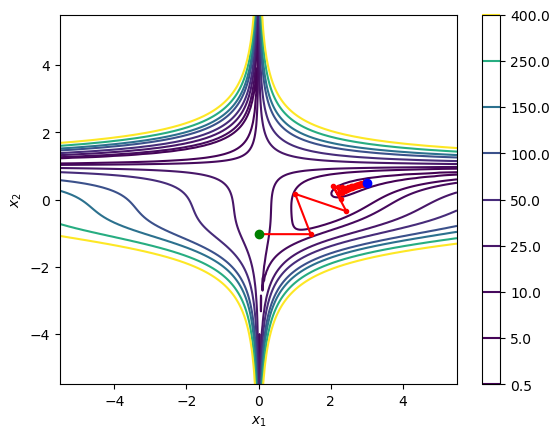


Resultado para x0 = [2. 4.]:
xk = [8.80910076 0.87411164], k = 29999, f(xk) = 0.2727725228936263, convergió: False
Numero de reinicios = 29999
Secuencia de puntos: [[-0.8610386458024326, -0.2797818394284919], [7.0990968270855515, 0.9347821884251166], [9.543265855403263, 0.8349074764147285], [9.541727103329563, 0.9104899952390839], [9.542097096063081, 0.8729747546629533], [9.541782827853552, 0.8927833845216915], [9.541937737568931, 0.8789168213918606], [9.541777315826682, 0.8889734481822247], [9.541851863499115, 0.8818451194975151], [9.54176321811601, 0.886986344097162]]


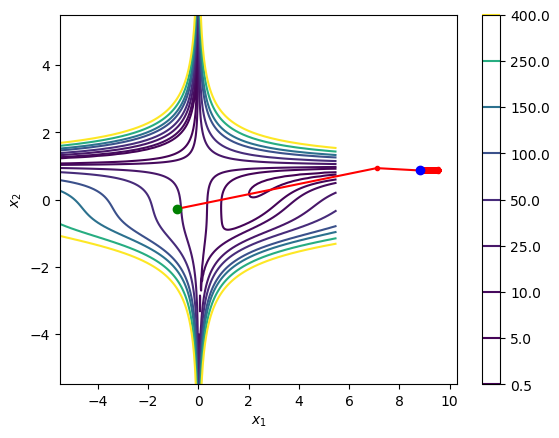


Función de Rosenbrock:
Resultado para x0 = [-2.1  4.5]:
xk = [1.00000001 1.00000002], k = 29404, f(xk) = 1.5141529525083476e-16, convergió: True
Numero de reinicios = 29403
Secuencia de puntos: [[-2.1281519845298686, 4.492698332542686], [-2.113068050611971, 4.495645978109119], [-2.121030458258008, 4.493164271829933], [-2.1165690571775717, 4.493619079149491], [-2.11876434651847, 4.492503181104041], [-2.1170372180530563, 4.492164381196064], [-2.1183064866824655, 4.49111803211161], [-2.1168178938446953, 4.490722965192734], [-2.1181289603115614, 4.4894800376466035], [-2.1162598112324873, 4.489174813228342]]


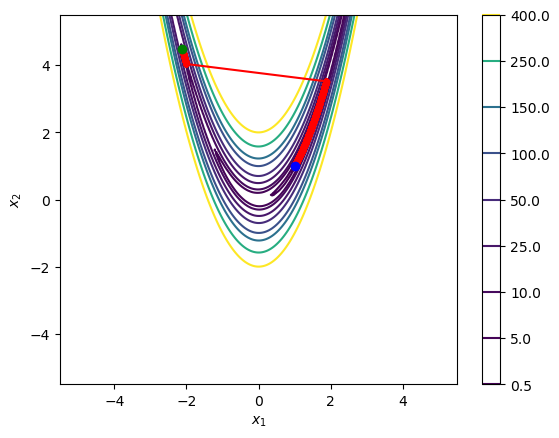


Resultado para x0 = [-1.2  1. ]:
xk = [1.00000001 1.00000002], k = 18897, f(xk) = 1.5494232100493137e-16, convergió: True
Numero de reinicios = 18896
Secuencia de puntos: [[-0.9331001275300715, 1.1089387234571135], [-1.06472881804076, 1.0351999351051655], [-0.9934584085404824, 1.0656679670658145], [-1.0356883732216766, 1.0413089102514708], [-1.0092964416696537, 1.0510086335030349], [-1.0232748841506552, 1.0410031916244173], [-1.013156967640809, 1.0428874282531315], [-1.0182250800020491, 1.0365428357711028], [1.0983762999768318, 1.0610653598365491], [1.0983762999768318, 1.0610653598365491]]


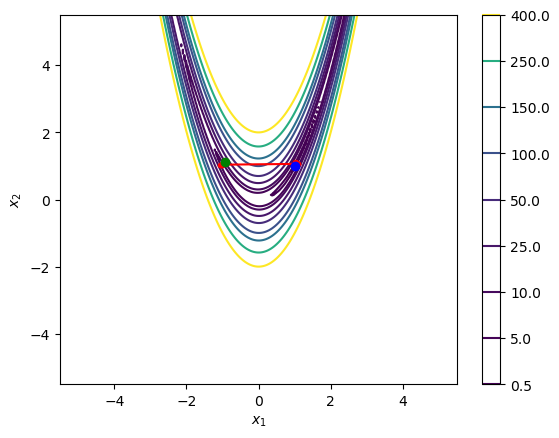


Resultado para x0 = [-2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5 -2.1  4.5]:
xk = [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999998], k = 29999, f(xk) = 1.9614222878592898e-16, convergió: False
Numero de reinicios = 30000

Resultado para x0 = [-1.2  1.  -1.2  1.  -1.2  1.  -1.2  1.  -1.2  1. ]:
xk = [1.         1.         1.         1.         1.         1.
 1.         0.99999999 0.99999999 0.99999997], k = 29999, f(xk) = 2.8415296346464865e-16, convergió: False
Numero de reinicios = 30000



In [47]:
# Puntos iniciales para la función de Himmelblau
puntos_iniciales_himmelblau = [np.array([2.0, 4.0])]

# Puntos iniciales para la función de Beale
puntos_iniciales_beale = [np.array([2.0, 3.0])]

# Puntos iniciales para la función de Rosenbrock
puntos_iniciales_rosenbrock = [
    np.array([-1.2, 1.0]),
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(20)]), # Usamos una list comprenhension
    np.array([-1.2 if i % 2 == 0 else 1.0 for i in range(40)])
]
# Epsilon de la máquina
epsilon_m = np.finfo(float).eps

# Configuración de tolerancia
tau = lambda n: np.sqrt(n) * epsilon_m**(1/3)

# Parámetros iniciales
alpha_0 = 1
rho = 0.8
c1 = 0.1
c2 = 0.1

# Número máximo de iteraciones para el descenso máximo y la sección dorada
NMax = 5000
NBack = 600

# Función para probar el algoritmo de descenso máximo con diferentes funciones
def probar_descenso_maximo(func, grad_func, puntos_iniciales):
    for x0 in puntos_iniciales:
        xk, gk, k, convergio, secuencia, nr = ConjugateGrad_NLineal(x0, func, grad_func, NMax, tau(len(x0)), alpha_0, rho, c1, c2, NBack)
        valor_final = func(xk)
        print(f"Resultado para x0 = {x0}, f(x0) = {func(x0)}:")
        print(f"xk = {xk}, k = {k}, f(xk) = {valor_final}, convergió: {convergio}")
        print(f"Numero de reinicios = {nr}")
        if len(x0) == 2 and secuencia:
            print(f"Secuencia de puntos: {secuencia[:10]}")
            contornosFnc2D(func, xleft=-5.5, xright=5.5, ybottom=-5.5, ytop=5.5, levels=[0.5, 5, 10, 25, 50, 100, 150, 250, 400], secuencia=secuencia)
        print()

# Probar con la función de Himmelblau
print("Función de Himmelblau:")
probar_descenso_maximo(himmelblau, grad_himmelblau, puntos_iniciales_himmelblau)

# Probar con la función de Beale
print("Función de Beale:")
probar_descenso_maximo(beale, grad_beale, puntos_iniciales_beale)

# Probar con la función de Rosenbrock
print("Función de Rosenbrock:")
probar_descenso_maximo(rosenbrock, grad_rosenbrock, puntos_iniciales_rosenbrock)
